In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

from sklearn.decomposition import PCA

import os

df = pd.read_csv("C:\\Users\\jason\\Documents\\Python Scripts\\candyhierarchy2017.csv", encoding = "ISO-8859-1")

print('Number of attributes(cols)= %d' % (df.shape[1]))
print('Number of instances(rows)= %d' % (df.shape[0]))

df  #print the date_frame 120 cols and 2460 rows

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\jason\\Documents\\Python Scripts\\candyhierarchy2017.csv'

In [2]:
#dropping columns with over 50% NaN
df = df.replace('?', np.NaN)
columns_percentage = df.isna().mean().sort_values(ascending=False) #percentage of columns with NaN values
dropped_columns = {}; # dict to hold the dropped columns 

for index, value in columns_percentage.items():
    if value > 0.49:
        dropped_columns[index] = value
        df = df.drop([index] , axis= 1)

print('Number of attributes(cols)= %d' % (df.shape[1]))
print('Number of instances(rows)= %d' % (df.shape[0]))
columns_percentage
dropped_columns

Number of attributes(cols)= 113
Number of instances(rows)= 2460


{'Unnamed: 113': 0.9963414634146341,
 'Q12: MEDIA [Yahoo]': 0.9727642276422764,
 'Q12: MEDIA [Daily Dish]': 0.9654471544715447,
 'Q12: MEDIA [ESPN]': 0.9597560975609756,
 'Q9: OTHER COMMENTS': 0.843089430894309,
 'Q8: DESPAIR OTHER': 0.7089430894308943,
 'Q7: JOY OTHER': 0.6296747967479674}

In [3]:
#Partial columns renaming
df = df.rename(columns = {'Q1: GOING OUT?' : 'going_out', 'Q2: GENDER' : 'gender', 'Q3: AGE': 'age', 'Q4: COUNTRY' : 'country',
       'Q5: STATE, PROVINCE, COUNTY, ETC' : 'area', 'Q10: DRESS' : 'dress', 'Q11: DAY': 'day',
       'Q12: MEDIA [Daily Dish]' : 'media_DailyDish', 'Q12: MEDIA [Science]': 'media_Science', 'Q12: MEDIA [ESPN]' : 'media_ESPN',
       'Q12: MEDIA [Yahoo]': 'media_Yahoo'})

In [4]:
#str dropping prefix 'Q6 | '. str to lower case
df.columns = [x.lower() for x in df.columns.str.replace('Q6 \| ','',regex=True)]
my_list = df.columns.values.tolist()
my_list

print('Number of attributes(cols)= %d' % (df.shape[1]))
print('Number of instances(rows)= %d' % (df.shape[0]))

Number of attributes(cols)= 113
Number of instances(rows)= 2460


In [5]:
df

,internal id,going_out,gender,age,country,area,100 grand bar,anonymous brown globs that come in black and orange wrappers\t(a.k.a. mary janes),any full-sized candy bar,black jacks,...,"vials of pure high fructose corn syrup, for main-lining into your vein",vicodin,whatchamacallit bars,white bread,whole wheat anything,york peppermint patties,dress,day,media_science,"click coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,1.0,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,1.0,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY,White and gold,Friday,1.0,"(70, 10)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,90314359,No,Male,24,USA,MD,JOY,DESPAIR,MEH,DESPAIR,...,MEH,JOY,DESPAIR,MEH,DESPAIR,MEH,White and gold,Friday,NaN,NaN
2456,90314580,No,Female,33,USA,New York,MEH,DESPAIR,JOY,NaN,...,NaN,NaN,JOY,DESPAIR,MEH,JOY,Blue and black,Friday,1.0,"(70, 26)"
2457,90314634,No,Female,26,USA,Tennessee,MEH,DESPAIR,JOY,DESPAIR,...,MEH,JOY,MEH,DESPAIR,DESPAIR,MEH,Blue and black,Friday,1.0,"(67, 35)"
2458,90314658,No,Male,58,Usa,North Carolina,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print('Number of attributes(cols)= %d' % (df.shape[1]))
print('Number of instances(rows)= %d' % (df.shape[0]))

Number of attributes(cols)= 113
Number of instances(rows)= 2460


In [7]:
#dropping columns manually(dummy columns)
#make a list to hold the dummy columns
manually_drop_columns =[
 'bonkers (the board game)',
 'anonymous brown globs that come in black and orange wrappers\t(a.k.a. mary janes)',
 'any full-sized candy bar',
 'candy that is clearly just the stuff given out for free at restaurants',
 'cash, or other forms of legal tender',
 'chardonnay',
 "chick-o-sticks (we don't know what that is)",
 'creepy religious comics/chick tracts',
 'dental paraphernalia',
 'generic brand acetaminophen',
 'glow sticks',
 'gum from baseball cards',
 'healthy fruit',
 'hugs (actual physical hugs)',
 'jolly rancher (bad flavor)',
 'jolly ranchers (good flavor)',
 'joyjoy (mit iodine!)',
 'senior mints',
 'kale smoothie',
 'minibags of chips',
 'real housewives of orange county season 9 blue-ray',
 'sandwich-sized bags filled with booberry crunch',
 'spotted dick',
 'those odd marshmallow circus peanut things',
 'vials of pure high fructose corn syrup, for main-lining into your vein',
 'vicodin',
 'white bread',
 'whole wheat anything',
 'vials of pure high fructose corn syrup, for main-lining into your vein',
 'chick-o-sticks (we donõt know what that is)',
 'click coordinates (x, y)',
 'dress',
 'internal id',
 'broken glow stick',
 'area',
 'media_science',
 'dental paraphenalia',
 'pencils']


In [8]:
#since the columns are lower case in df
lowerCase_manually_drop_columns =list(map( lambda x : x.lower(),manually_drop_columns))
for  colName in lowerCase_manually_drop_columns:
        if colName in df.columns:
            df = df.drop([colName] , axis= 1)

print('Number of attributes(cols)= %d' % (df.shape[1]))
print('Number of instances(rows)= %d' % (df.shape[0]))

Number of attributes(cols)= 78
Number of instances(rows)= 2460


In [9]:
#delete any recorde that is empty on the fileds(gender,age,country)
df =df.dropna(subset= ['gender','age','country'], axis =0)
print('Number of attributes(cols)= %d' % (df.shape[1]))
print('Number of instances(rows)= %d' % (df.shape[0]))


Number of attributes(cols)= 78
Number of instances(rows)= 2363


In [10]:
#filling out null values

#going_out
df.going_out = df.going_out.fillna('Not Sure')
df.going_out.unique()

#gender
df.gender.value_counts()
df[df.gender == "I'd rather not say"].shape  #checking for spaces in text - found none


df.gender = df.gender.fillna("I'd rather not say") #adding the null values to "I'd rather not say"
df.gender.value_counts()




Male                  1436
Female                 827
I'd rather not say      70
Other                   30
Name: gender, dtype: int64

In [11]:
#country column

df.country.unique()

array(['USA ', 'USA', 'us', 'usa', 'canada', 'Canada', 'Us', 'US',
       'Murica', 'United States', 'uk', 'United Kingdom', 'united states',
       'Usa', 'United States ', 'United staes',
       'United States of America', 'UAE', 'England', 'UK', 'canada ',
       'Mexico', 'United states', 'u.s.a.', 'USAUSAUSA', 'america',
       'france', 'United States of America ', 'U.S.A.', 'finland',
       'unhinged states', 'Canada ', 'united states of america',
       'US of A', 'Unites States', 'The United States', 'North Carolina ',
       'Unied States', 'Netherlands', 'germany', 'Europe', 'Earth', 'U S',
       'u.s.', 'U.K. ', 'Costa Rica', 'The United States of America',
       'unite states', 'U.S.', 'cascadia', 'Australia', 'insanity lately',
       'Greece', 'USA? Hard to tell anymore..', "'merica", 'usas',
       'Pittsburgh', 'United State', 'France', 'australia', 'A', 'Can',
       'Canae', 'New York', 'Trumpistan', 'Ireland', 'United Sates',
       'Korea', 'California', 'Japan'

In [12]:
df.country.value_counts(dropna = False).sort_values(ascending = False)

USA              694
United States    490
usa              212
Canada           175
Usa              136
                ... 
usas               1
New Jersey         1
United Statea      1
France             1
A                  1
Name: country, Length: 124, dtype: int64

In [13]:
df['country']=df['country'].str.lower()
df['country']=df['country'].str.strip()

listA = df.country.value_counts()
for item in listA.items():
    print(item)

('usa', 1117)
('united states', 585)
('canada', 220)
('us', 180)
('united states of america', 72)
('uk', 18)
('united kingdom', 13)
('u.s.', 12)
('germany', 10)
('u.s.a.', 8)
('australia', 7)
('netherlands', 6)
('japan', 5)
('scotland', 5)
('america', 5)
('mexico', 4)
('ireland', 4)
('unites states', 4)
('us of a', 4)
('switzerland', 3)
('france', 3)
('united state', 2)
('united ststes', 2)
('the united states', 2)
('hong kong', 2)
('united stated', 2)
('denmark', 2)
('sweden', 2)
('china', 2)
('usaa', 1)
('england', 1)
('endland', 1)
('usas', 1)
('unied states', 1)
('united sates', 1)
('u s', 1)
("'merica", 1)
('usa! usa! usa!', 1)
('unhinged states', 1)
("i don't know anymore", 1)
('insanity lately', 1)
('murrika', 1)
('cascadia', 1)
('usa usa usa!!!!', 1)
('finland', 1)
('canada`', 1)
('unite states', 1)
('north carolina', 1)
('u.k.', 1)
('singapore', 1)
('united statss', 1)
('trumpistan', 1)
('atlantis', 1)
('greece', 1)
('earth', 1)
('spain', 1)
('canae', 1)
('iceland', 1)
('new y

In [14]:
df

,going_out,gender,age,country,100 grand bar,black jacks,bonkers (the candy),bottle caps,box'o'raisins,butterfinger,...,sweetums (a friend to diabetes),take 5,tic tacs,three musketeers,tolberone something or other,trail mix,twix,whatchamacallit bars,york peppermint patties,day
1,No,Male,44,usa,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,...,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,Sunday
2,Not Sure,Male,49,usa,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,Male,40,us,MEH,MEH,MEH,MEH,DESPAIR,MEH,...,MEH,JOY,MEH,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,Sunday
4,No,Male,23,usa,JOY,DESPAIR,MEH,MEH,DESPAIR,MEH,...,DESPAIR,MEH,DESPAIR,JOY,JOY,DESPAIR,JOY,JOY,JOY,Friday
6,No,Male,53,usa,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,No,Male,24,usa,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,...,DESPAIR,MEH,JOY,MEH,MEH,JOY,JOY,DESPAIR,MEH,Friday
2456,No,Female,33,usa,MEH,NaN,NaN,NaN,DESPAIR,JOY,...,NaN,JOY,DESPAIR,MEH,MEH,DESPAIR,JOY,JOY,JOY,Friday
2457,No,Female,26,usa,MEH,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,...,DESPAIR,MEH,MEH,JOY,JOY,MEH,MEH,MEH,MEH,Friday
2458,No,Male,58,usa,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df['country']=df['country'].str.lower()
df['country']=df['country'].str.strip()

usList=['usa', 'murica', 'us', 'united states','america','united states of america','u.s.a.',
         'u.s','u s','u.s.', 'u s a', 'unite states', 'united state','us of a','united stated',
         'unites states','united stated','united state','united ststes','the united states','usa usa usa!!!!','ud',
         'the united states of america','murica','united staes','u s','i pretend to be from canada, but i am really from the united states.'
       ]
canadas=['canada', 'can']


other = [x for x in df.country.unique()]
other.remove('usa')
other.remove('canada')


df.country = df.country.replace(to_replace = usList,value='usa')
df.country = df.country.replace(to_replace = canadas,value='canada')
df.country = df.country.replace(to_replace = other, value = 'other')

df

,going_out,gender,age,country,100 grand bar,black jacks,bonkers (the candy),bottle caps,box'o'raisins,butterfinger,...,sweetums (a friend to diabetes),take 5,tic tacs,three musketeers,tolberone something or other,trail mix,twix,whatchamacallit bars,york peppermint patties,day
1,No,Male,44,usa,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,...,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,Sunday
2,Not Sure,Male,49,usa,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,Male,40,usa,MEH,MEH,MEH,MEH,DESPAIR,MEH,...,MEH,JOY,MEH,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,Sunday
4,No,Male,23,usa,JOY,DESPAIR,MEH,MEH,DESPAIR,MEH,...,DESPAIR,MEH,DESPAIR,JOY,JOY,DESPAIR,JOY,JOY,JOY,Friday
6,No,Male,53,usa,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,No,Male,24,usa,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,...,DESPAIR,MEH,JOY,MEH,MEH,JOY,JOY,DESPAIR,MEH,Friday
2456,No,Female,33,usa,MEH,NaN,NaN,NaN,DESPAIR,JOY,...,NaN,JOY,DESPAIR,MEH,MEH,DESPAIR,JOY,JOY,JOY,Friday
2457,No,Female,26,usa,MEH,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,...,DESPAIR,MEH,MEH,JOY,JOY,MEH,MEH,MEH,MEH,Friday
2458,No,Male,58,usa,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
listA = df.country.value_counts()
for item in listA.items():
    print(item)


('usa', 2004)
('canada', 221)
('other', 138)


In [17]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')

df

,going_out,gender,age,country,100 grand bar,black jacks,bonkers (the candy),bottle caps,box'o'raisins,butterfinger,...,sweetums (a friend to diabetes),take 5,tic tacs,three musketeers,tolberone something or other,trail mix,twix,whatchamacallit bars,york peppermint patties,day
1,No,Male,44.0,usa,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,...,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,Sunday
2,Not Sure,Male,49.0,usa,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,Male,40.0,usa,MEH,MEH,MEH,MEH,DESPAIR,MEH,...,MEH,JOY,MEH,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,Sunday
4,No,Male,23.0,usa,JOY,DESPAIR,MEH,MEH,DESPAIR,MEH,...,DESPAIR,MEH,DESPAIR,JOY,JOY,DESPAIR,JOY,JOY,JOY,Friday
6,No,Male,53.0,usa,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,No,Male,24.0,usa,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,...,DESPAIR,MEH,JOY,MEH,MEH,JOY,JOY,DESPAIR,MEH,Friday
2456,No,Female,33.0,usa,MEH,NaN,NaN,NaN,DESPAIR,JOY,...,NaN,JOY,DESPAIR,MEH,MEH,DESPAIR,JOY,JOY,JOY,Friday
2457,No,Female,26.0,usa,MEH,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,...,DESPAIR,MEH,MEH,JOY,JOY,MEH,MEH,MEH,MEH,Friday
2458,No,Male,58.0,usa,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#Replacing all the values remaining with values that are easy to quantify.
df = df.replace(np.NaN, 0)
df = df.replace("DESPAIR", 1)
df = df.replace("MEH", 2)
df = df.replace("JOY", 3)
df

,going_out,gender,age,country,100 grand bar,black jacks,bonkers (the candy),bottle caps,box'o'raisins,butterfinger,...,sweetums (a friend to diabetes),take 5,tic tacs,three musketeers,tolberone something or other,trail mix,twix,whatchamacallit bars,york peppermint patties,day
1,No,Male,44.0,usa,2,2,1,1,1,1,...,1,1,1,3,3,1,3,1,1,Sunday
2,Not Sure,Male,49.0,usa,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,No,Male,40.0,usa,2,2,2,2,1,2,...,2,3,2,1,3,2,3,3,1,Sunday
4,No,Male,23.0,usa,3,1,2,2,1,2,...,1,2,1,3,3,1,3,3,3,Friday
6,No,Male,53.0,usa,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,No,Male,24.0,usa,3,1,1,2,1,2,...,1,2,3,2,2,3,3,1,2,Friday
2456,No,Female,33.0,usa,2,0,0,0,1,3,...,0,3,1,2,2,1,3,3,3,Friday
2457,No,Female,26.0,usa,2,1,2,1,2,1,...,1,2,2,3,3,2,2,2,2,Friday
2458,No,Male,58.0,usa,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#Sort the data from lowest age to highest for testing purposes
df = df.sort_values(by='age', ascending = True)
df

,going_out,gender,age,country,100 grand bar,black jacks,bonkers (the candy),bottle caps,box'o'raisins,butterfinger,...,sweetums (a friend to diabetes),take 5,tic tacs,three musketeers,tolberone something or other,trail mix,twix,whatchamacallit bars,york peppermint patties,day
1892,No,Male,0.0,usa,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2214,Yes,Male,0.0,other,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,Sunday
638,Yes,Other,0.0,other,3,1,1,1,2,2,...,1,1,1,1,3,2,3,3,1,Friday
492,No,Male,0.0,usa,3,1,0,2,1,2,...,0,0,2,3,2,2,2,0,3,Sunday
1928,No,Female,0.0,usa,3,0,0,0,2,2,...,0,0,0,0,3,0,0,0,3,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,No,I'd rather not say,99.0,usa,2,1,1,2,1,2,...,1,1,1,1,3,2,3,3,2,Friday
1495,No,I'd rather not say,100.0,usa,2,2,2,3,2,3,...,2,2,2,2,2,1,3,2,3,Sunday
884,No,I'd rather not say,102.0,other,2,1,1,1,1,3,...,1,1,1,2,3,1,3,1,1,Friday
506,No,Other,312.0,canada,2,1,2,2,1,3,...,2,2,1,3,3,1,2,2,3,Sunday


In [20]:
#Calculating the Z-Score values to find any strange outliers.
Z = (df - df.mean())/df.std()
Z = Z.sort_values(by='age', ascending = True)
Z

,100 grand bar,abstained from m&m'ing.,age,black jacks,blue m&m's,bonkers (the candy),bottle caps,box'o'raisins,butterfinger,cadbury creme eggs,...,sweet tarts,sweetums (a friend to diabetes),take 5,three musketeers,tic tacs,tolberone something or other,trail mix,twix,whatchamacallit bars,york peppermint patties
1892,-1.427154,-1.072951,-1.746924,-1.078513,-1.443855,-1.098386,-1.239307,-1.271400,-1.503737,-1.371997,...,-1.359739,-1.024047,-1.148865,-1.446098,-1.269402,-1.518106,-1.264995,-1.555933,-1.261221,-1.427889
347,1.024880,-0.064044,-1.746924,0.053662,0.952653,-0.064740,-0.331813,1.214590,0.871484,1.133435,...,0.309818,0.045252,-0.315347,0.942389,-0.249478,0.798762,0.844521,-0.015967,-0.467964,-1.427889
1550,-1.427154,-1.072951,-1.746924,-1.078513,-1.443855,-1.098386,-1.239307,-1.271400,-1.503737,-1.371997,...,-1.359739,-1.024047,-1.148865,-1.446098,-1.269402,-1.518106,-1.264995,-1.555933,-1.261221,-1.427889
2364,-1.427154,-1.072951,-1.746924,-1.078513,-1.443855,-1.098386,-1.239307,-1.271400,-1.503737,-1.371997,...,-1.359739,-1.024047,-1.148865,-1.446098,-1.269402,-1.518106,-1.264995,-1.555933,-1.261221,-1.427889
1146,-1.427154,-1.072951,-1.746924,-1.078513,-1.443855,-1.098386,-1.239307,-1.271400,-1.503737,-1.371997,...,-1.359739,-1.024047,-1.148865,-1.446098,-1.269402,-1.518106,-1.264995,-1.555933,-1.261221,-1.427889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,0.207536,-0.064044,2.357450,0.053662,0.952653,-0.064740,0.575680,-0.028405,0.079744,0.298291,...,0.309818,0.045252,-0.315347,-0.649935,-0.249478,0.798762,0.844521,0.754016,1.118549,0.145852
1495,0.207536,0.944863,2.398909,1.185837,0.952653,0.968907,1.483174,1.214590,0.871484,0.298291,...,1.144597,1.114551,0.518171,0.146227,0.770446,0.026473,-0.210237,0.754016,0.325292,0.932723
884,0.207536,-0.064044,2.481825,0.053662,0.153817,-0.064740,-0.331813,-0.028405,0.871484,0.298291,...,1.144597,0.045252,-0.315347,0.146227,-0.249478,0.798762,-0.210237,0.754016,-0.467964,-0.641018
506,0.207536,-0.064044,11.188073,0.053662,-0.645019,0.968907,0.575680,-0.028405,0.871484,1.133435,...,1.144597,1.114551,0.518171,0.942389,-0.249478,0.798762,-0.210237,-0.015967,0.325292,0.932723


In [21]:
#This is the location of the outliers based off of high Z score
#Any Z score higher than 3,(which is an outlier) is going to be removed
Z2 = Z.loc[((Z>3).sum(axis=1)==1)]

#Drop the returned rows with high Z-Scores
df = df.drop(Z2.index.values)
#The new Clean Data
df



,going_out,gender,age,country,100 grand bar,black jacks,bonkers (the candy),bottle caps,box'o'raisins,butterfinger,...,sweetums (a friend to diabetes),take 5,tic tacs,three musketeers,tolberone something or other,trail mix,twix,whatchamacallit bars,york peppermint patties,day
1892,No,Male,0.0,usa,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2214,Yes,Male,0.0,other,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,Sunday
638,Yes,Other,0.0,other,3,1,1,1,2,2,...,1,1,1,1,3,2,3,3,1,Friday
492,No,Male,0.0,usa,3,1,0,2,1,2,...,0,0,2,3,2,2,2,0,3,Sunday
1928,No,Female,0.0,usa,3,0,0,0,2,2,...,0,0,0,0,3,0,0,0,3,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,No,I'd rather not say,90.0,other,2,2,2,3,2,3,...,1,2,2,2,3,3,3,3,3,Friday
1411,Yes,Male,90.0,usa,3,2,2,2,2,2,...,1,3,3,3,3,3,3,1,3,Friday
575,No,I'd rather not say,99.0,usa,2,1,1,2,1,2,...,1,1,1,1,3,2,3,3,2,Friday
1495,No,I'd rather not say,100.0,usa,2,2,2,3,2,3,...,2,2,2,2,2,1,3,2,3,Sunday


Age	Sum	 Average		 Standard Deviation
		 41.61685726387124 	 12.743462416325931
40.0     92
34.0     90
37.0     87
43.0     84
36.0     79
         ..
100.0     1
39.4      1
99.0      1
88.0      1
1.0       1
Name: age, Length: 81, dtype: int64


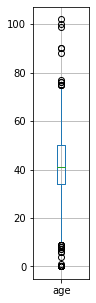

In [22]:
#Plotting the Age on a boxplot to see the varience and average age
dfAge = df[['age']]
dfAge.boxplot(figsize = (1,5))
print("Age\tSum\t Average\t\t Standard Deviation\n\t\t", df.age.mean(),"\t", df.age.std())
print(df.age.value_counts())

In [23]:
#The mean of all the data
df.mean().sort_values(ascending = False)

age                                41.616857
reeseõs peanut butter cups          2.052097
kit kat                             2.051673
twix                                2.020330
snickers                            2.009318
                                     ...    
bonkers (the candy)                 1.061838
box'o'raisins                       1.022448
maynards                            1.013554
sweetums (a friend to diabetes)     0.956798
black jacks                         0.952139
Length: 74, dtype: float64

In [24]:
#How much each column is deviating by
df.std().sort_values(ascending = False)

age                                12.743462
reeseõs peanut butter cups          1.309126
twix                                1.299124
snickers                            1.297944
lindt truffle                       1.295604
                                     ...    
trail mix                           0.948334
sweetums (a friend to diabetes)     0.935096
peeps                               0.916238
black jacks                         0.883366
box'o'raisins                       0.804598
Length: 74, dtype: float64

In [25]:
#The sum of all the data in each column.
df.sum(numeric_only = True).sort_values(ascending = False)

age                                98257.4
reeseõs peanut butter cups          4845.0
kit kat                             4844.0
twix                                4770.0
snickers                            4744.0
                                    ...   
bonkers (the candy)                 2507.0
box'o'raisins                       2414.0
maynards                            2393.0
sweetums (a friend to diabetes)     2259.0
black jacks                         2248.0
Length: 74, dtype: float64

In [26]:
#Splitting the data now
import os
from sklearn.model_selection import train_test_split

#The data as of now
df.head()

,going_out,gender,age,country,100 grand bar,black jacks,bonkers (the candy),bottle caps,box'o'raisins,butterfinger,...,sweetums (a friend to diabetes),take 5,tic tacs,three musketeers,tolberone something or other,trail mix,twix,whatchamacallit bars,york peppermint patties,day
1892,No,Male,0.0,usa,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2214,Yes,Male,0.0,other,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,Sunday
638,Yes,Other,0.0,other,3,1,1,1,2,2,...,1,1,1,1,3,2,3,3,1,Friday
492,No,Male,0.0,usa,3,1,0,2,1,2,...,0,0,2,3,2,2,2,0,3,Sunday
1928,No,Female,0.0,usa,3,0,0,0,2,2,...,0,0,0,0,3,0,0,0,3,Friday


In [27]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df['Country Joy']= le.fit_transform(df['country'])#JUST EXAMPLE

df[0:5]

,going_out,gender,age,country,100 grand bar,black jacks,bonkers (the candy),bottle caps,box'o'raisins,butterfinger,...,take 5,tic tacs,three musketeers,tolberone something or other,trail mix,twix,whatchamacallit bars,york peppermint patties,day,Country Joy
1892,No,Male,0.0,usa,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2214,Yes,Male,0.0,other,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,Sunday,1
638,Yes,Other,0.0,other,3,1,1,1,2,2,...,1,1,1,3,2,3,3,1,Friday,1
492,No,Male,0.0,usa,3,1,0,2,1,2,...,0,2,3,2,2,2,0,3,Sunday,2
1928,No,Female,0.0,usa,3,0,0,0,2,2,...,0,0,0,3,0,0,0,3,Friday,2


In [28]:
#Splitting the data into test and training sets. Ratio is 75 to 25
x_train, x_test, y_train, y_test = train_test_split(df[['twix','snickers','take 5','kit kat']],df['Country Joy'],test_size = .20, random_state=42)

In [29]:
x_train.shape

(1888, 4)

In [30]:
x_train.describe()

,twix,snickers,take 5,kit kat
count,1888.000000,1888.000000,1888.000000,1888.000000
mean,2.011123,2.002119,1.349576,2.043962
std,1.298723,1.298156,1.189799,1.291067
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,3.000000
75%,3.000000,3.000000,2.000000,3.000000
max,3.000000,3.000000,3.000000,3.000000


In [31]:
y_train.shape

(1888,)

In [32]:
y_train.describe()

count    1888.000000
mean        1.747352
std         0.621334
min         0.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: Country Joy, dtype: float64

In [33]:
x_test.shape

(473, 4)

In [34]:
x_test.describe()

,twix,snickers,take 5,kit kat
count,473.000000,473.000000,473.000000,473.000000
mean,2.057082,2.038055,1.488372,2.082452
std,1.301449,1.298071,1.233524,1.286982
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,2.000000,3.000000
75%,3.000000,3.000000,3.000000,3.000000
max,3.000000,3.000000,3.000000,3.000000


In [35]:
y_test.shape

(473,)

In [36]:
y_test.describe()

count    473.000000
mean       1.788584
std        0.557800
min        0.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: Country Joy, dtype: float64

In [37]:
#****************************************more data visualization**************************************** - mohammad 
df.age.describe()

count    2361.000000
mean       41.616857
std        12.743462
min         0.000000
25%        34.000000
50%        41.000000
75%        50.000000
max       102.000000
Name: age, dtype: float64

In [38]:
%matplotlib inline

# chart styling
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = 'white'

# Setting a Halloween themed colored palette
colors = ['#000000', '#8a29b2', '#ff9936', '#ff6100', '#a9640e', '#000000', '#8a29b2', '#ff9936', '#ff6100', '#a9640e', '#000000', '#8a29b2', '#ff9936', '#ff6100', '#a9640e', '#000000', '#8a29b2', '#ff9936', '#ff6100', '#a9640e', '#000000', '#8a29b2', '#ff9936', '#ff6100', '#a9640e', '#000000', '#8a29b2', '#ff9936', '#ff6100', '#a9640e', '#000000', '#8a29b2', '#ff9936', '#ff6100', '#a9640e', '#000000', '#8a29b2', '#ff9936', '#ff6100', '#a9640e', '#000000', '#8a29b2', '#ff9936', '#ff6100', '#a9640e', '#000000', '#8a29b2', '#ff9936', '#ff6100', '#a9640e', '#000000', '#8a29b2', '#ff9936', '#ff6100', '#a9640e', '#000000', '#8a29b2', '#ff9936', '#ff6100', '#a9640e', '#000000', '#8a29b2', '#ff9936', '#ff6100', '#a9640e', '#000000', '#8a29b2', '#ff9936', '#ff6100', '#a9640e', '#000000', '#8a29b2', '#ff9936', '#ff6100', '#a9640e', '#000000', '#8a29b2', '#ff9936', '#ff6100', '#a9640e', '#000000', '#8a29b2', '#ff9936', '#ff6100', '#a9640e', '#000000', '#8a29b2', '#ff9936', '#ff6100', '#a9640e']
sns.set_palette(colors)

No          1979
Yes          300
Not Sure      82
Name: going_out, dtype: int64

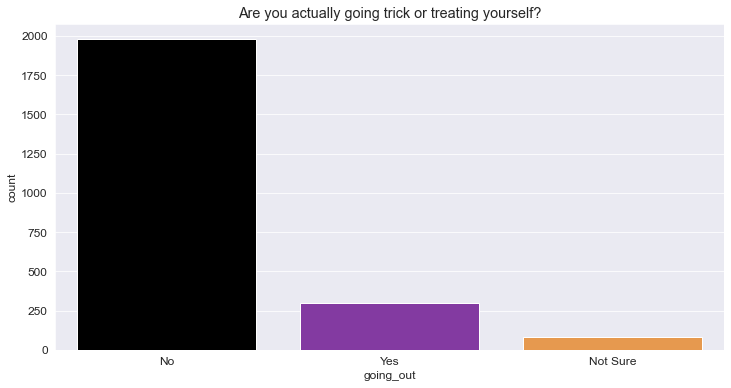

In [39]:
#Visualize in a bar chart
plt.figure(figsize=(12,6))
plt.xticks(rotation=0)
plt.title('Are you actually going trick or treating yourself?')
sns.countplot(x = 'going_out', data =df);
df['going_out'].value_counts()

Male                  1436
Female                 827
I'd rather not say      69
Other                   29
Name: gender, dtype: int64

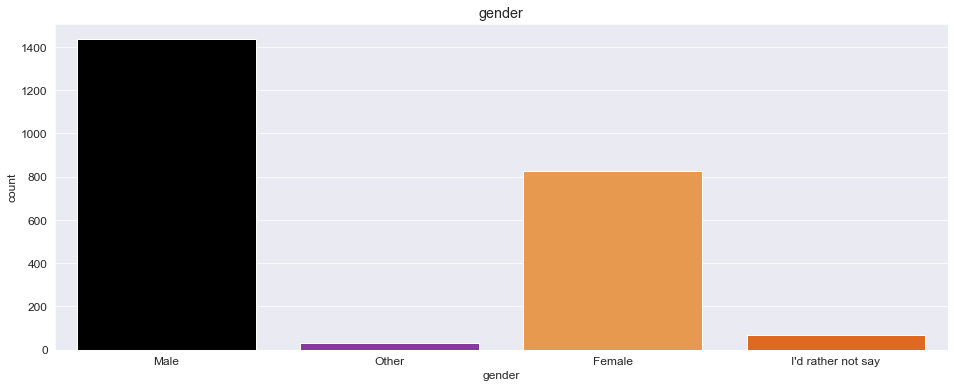

In [40]:
#Visualize in a bar chart
plt.figure(figsize=(16,6))
plt.xticks(rotation=0)
plt.title('gender')
sns.countplot(x = 'gender', data = df);
df.gender.value_counts()

(array([ 26.,  10.,  27.,  30.,  62., 151., 338., 389., 405., 323., 255.,
        161., 108.,  40.,  24.,   6.,   0.,   1.,   2.,   2.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100]),
 <BarContainer object of 20 artists>)

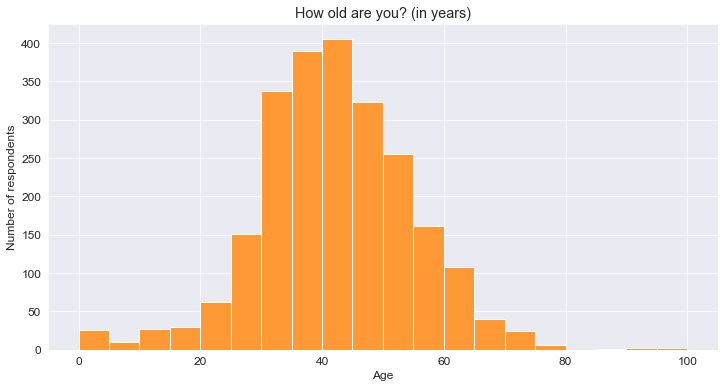

In [41]:
#Display age range in a histogram
plt.figure(figsize=(12,6))
plt.xticks(rotation=0)
plt.title('How old are you? (in years)')
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(df.age, bins=np.arange(0,105,5), color='#ff9936')

usa       2004
canada     220
other      137
Name: country, dtype: int64

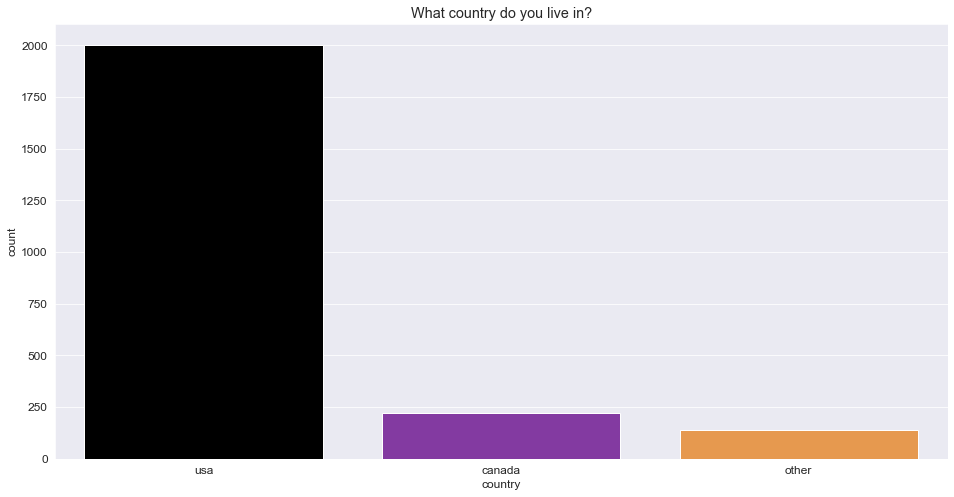

In [42]:
#Visualize the top 10 countries of responses in a bar chart
plt.figure(figsize=(16, 8))
plt.xticks(rotation=0)
plt.title('What country do you live in?')
sns.countplot(x = 'country', data = df, order=df.country.value_counts().iloc[0:10].index);
df['country'].value_counts()

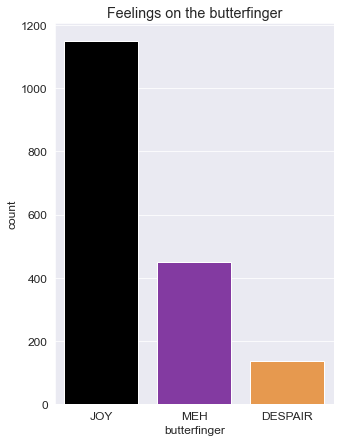

In [43]:
#Visualize the candy ratings
d1 = df.copy()
d1 = d1.replace( 0 ,np.NaN)
d1 = d1.replace( 1,"DESPAIR")
d1 = d1.replace( 2,"MEH")
d1 = d1.replace( 3, "JOY")

plt.figure(figsize=(5,7))
plt.xticks(rotation=0)
plt.title('Feelings on the butterfinger')
sns.countplot(x = 'butterfinger', data = d1);

In [44]:
#Created a data range of 8 candies 
d2_sample = d1.iloc[0: , 26:34]

d2_sample

,junior mints,kinder happy hippo,kit kat,laffytaffy,lemonheads,licorice (not black),licorice (yes black),lindt truffle
1892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2214,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY
638,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY
492,JOY,MEH,JOY,MEH,JOY,MEH,DESPAIR,JOY
1928,JOY,NaN,JOY,NaN,NaN,NaN,NaN,JOY
...,...,...,...,...,...,...,...,...
451,MEH,JOY,JOY,DESPAIR,JOY,JOY,DESPAIR,JOY
1411,JOY,DESPAIR,JOY,JOY,JOY,JOY,DESPAIR,MEH
575,MEH,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH
1495,JOY,DESPAIR,JOY,JOY,JOY,MEH,MEH,MEH


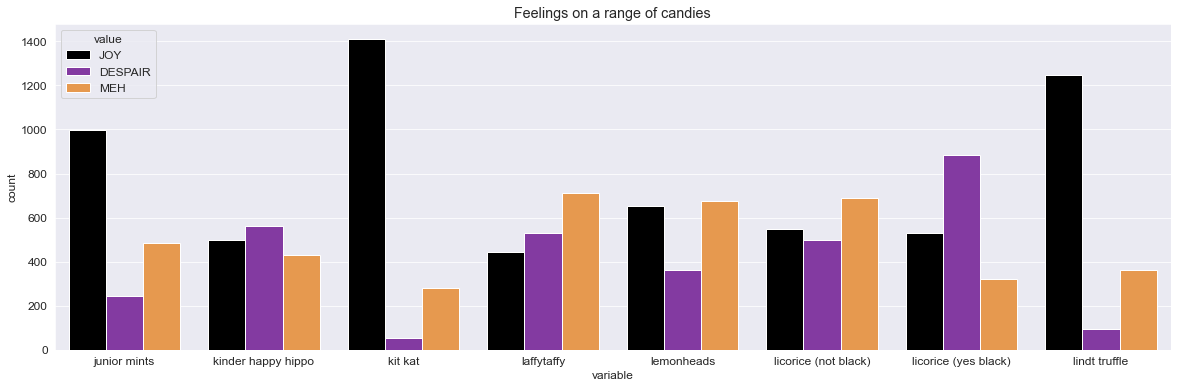

In [45]:
#Visualize ratings
d2_sample_rating = pd.melt(d2_sample) # .melt() function rotates data like a pivot table
plt.figure(figsize=(20,6))
plt.xticks(rotation=0)
plt.title('Feelings on a range of candies')
sns.countplot(x = 'variable', hue='value', data = d2_sample_rating);

In [46]:
# PCA 
data = pd.read_csv("C:\\Users\\jason\\Documents\\Python Scripts\\candy-data.csv", encoding = "ISO-8859-1")

print('Number of attributes(cols)= %d' % (data.shape[1]))
print('Number of instances(rows)= %d' % (data.shape[0]))

data  #print the date_frame 120 cols and 2460 rows

Number of attributes(cols)= 13
Number of instances(rows)= 85


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÃs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÃs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [47]:
#Exploratory data analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


C:\Users\jason\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='winpercent', ylabel='Density'>

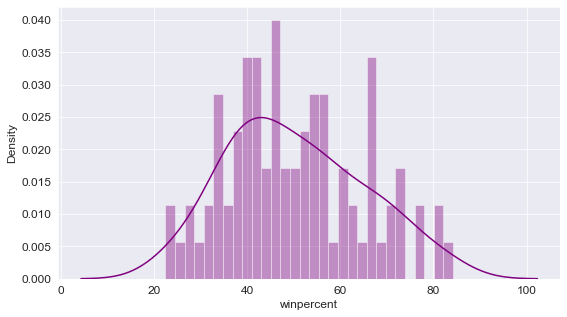

In [48]:
sns.distplot(data['winpercent'],bins=30,color='purple')

In [49]:
# which product got the highest "win" percentage
data.sort_values('winpercent', ascending = False).head(5)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
52,ReeseÃs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
51,ReeseÃs Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782


In [50]:
# which product got the lowest "win" percentage
data.sort_values('winpercent', ascending = True).head(5)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
44,Nik L Nip,0,1,0,0,0,0,0,0,1,0.197,0.976,22.445341
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
12,Chiclets,0,1,0,0,0,0,0,0,1,0.046,0.325,24.524988
72,Super Bubble,0,1,0,0,0,0,0,0,0,0.162,0.116,27.303865
26,Jawbusters,0,1,0,0,0,0,1,0,1,0.093,0.511,28.127439


In [51]:
# top 5 sugar percent
data.sort_values('sugarpercent', ascending = False).head(5)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
54,ReeseÃs stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901
70,Sugar Babies,0,0,1,0,0,0,0,0,1,0.965,0.767,33.437550
38,Milky Way Simply Caramel,1,0,1,0,0,0,0,1,0,0.965,0.860,64.353340
61,Skittles wildberry,0,1,0,0,0,0,0,0,1,0.941,0.220,55.103695
60,Skittles original,0,1,0,0,0,0,0,0,1,0.941,0.220,63.085140


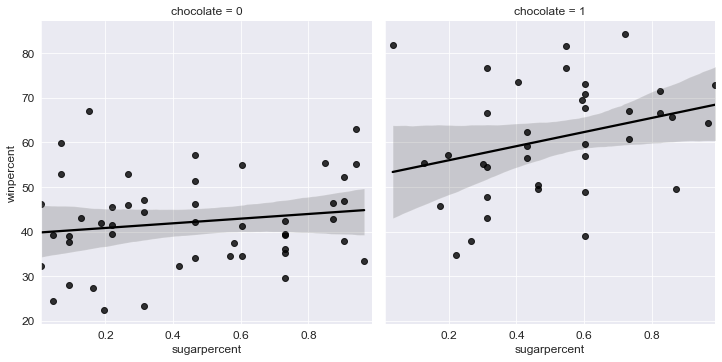

In [52]:
# assumption: sugar impacts the win percent.
sns.lmplot(x="sugarpercent", y="winpercent", col='chocolate', data=data)

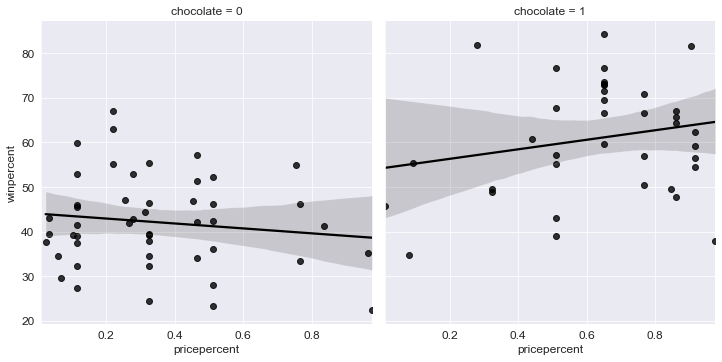

In [53]:
# assumption: sugar impacts the win percent.
sns.lmplot(x="pricepercent", y="winpercent", col='chocolate', data=data)

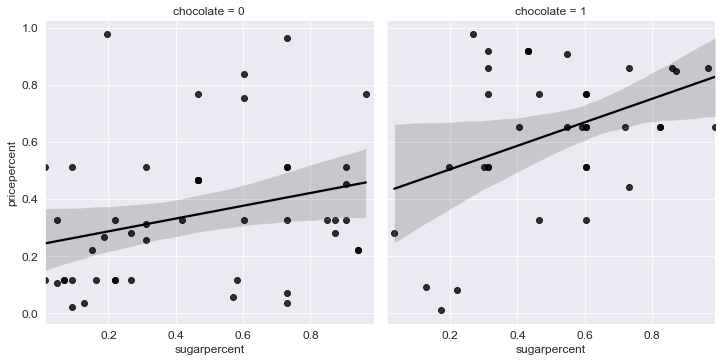

In [54]:
sns.lmplot(x="sugarpercent", y="pricepercent", col='chocolate', data=data)

0.9707115231765265


Text(0, 0.5, '% variance')

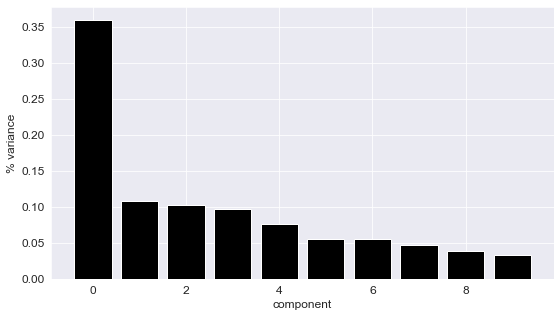

In [55]:

#PCA + k-means algorithm

 #   to visualize data in 2D    find patterns between clusters  

data_km = data.copy()
data_km.set_index('competitorname', inplace = True)


#normalize 
standard_scaler = StandardScaler()
data_norm = standard_scaler.fit_transform(data_km)


pca = PCA(n_components=10)
pca_ft = pca.fit_transform(data_norm)
num_components = range(pca.n_components_)
all_var = np.sum(pca.explained_variance_ratio_)
print(all_var)
plt.bar(num_components,pca.explained_variance_ratio_)
plt.xlabel('component')
plt.ylabel('% variance')

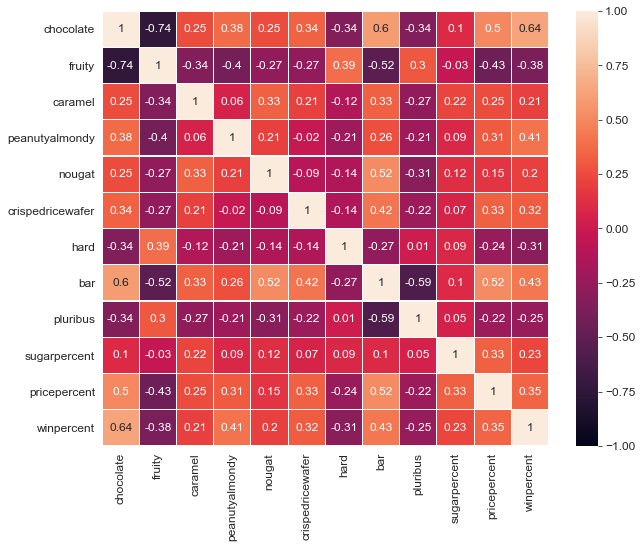

In [56]:
plt.figure(figsize=(10, 8))
sns.heatmap(round(data.corr(), 2), annot=True, vmin=-1, vmax = +1, linewidths=0.1, annot_kws={"fontsize":12})
plt.show()



In [57]:
data1 = data.copy()
pca = PCA(svd_solver='randomized', random_state=123) #instantiate.
pca.fit(data1.drop('competitorname', axis=1)) # fit.

PCA(random_state=123, svd_solver='randomized')

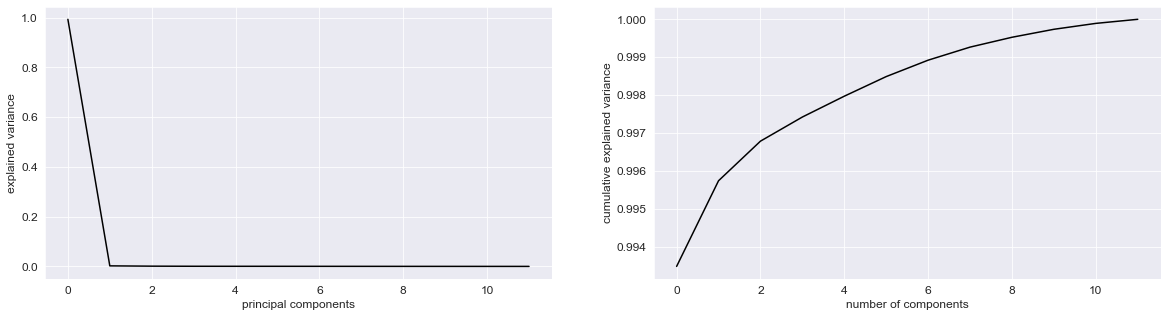

In [58]:
# Making the screeplot - plotting the cumulative variance against the number of components

fig = plt.figure(figsize = (20,5))
ax = plt.subplot(121)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('principal components')
plt.ylabel('explained variance')

ax2 = plt.subplot(122)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

plt.show()



In [59]:

# we'll use first 2 principal components as it retains 95% of variance.

df_pca_2_comp = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':data1.drop(
                              'competitorname', axis=1).columns})
# df_pca_2_comp



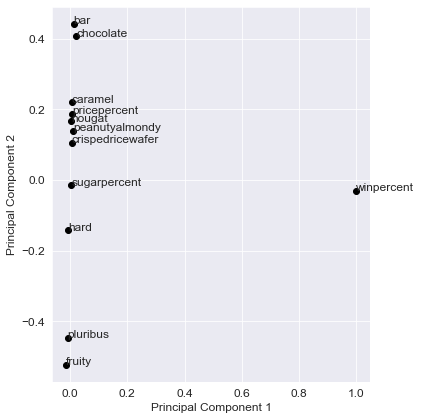

In [60]:
# we can visualize what the principal components seem to capture.

fig = plt.figure(figsize = (6,6))
plt.scatter(df_pca_2_comp.PC1, df_pca_2_comp.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(df_pca_2_comp.Feature):
    plt.annotate(txt, (df_pca_2_comp.PC1[i],df_pca_2_comp.PC2[i]))
plt.tight_layout()
plt.show()

In [61]:

df_pca = pca.transform(data1.drop('competitorname', axis=1)) # our data transformed with new features as principal components.
df_pca = df_pca[:, 0:2] # Since we require first two principal components only.



In [62]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
df_s = standard_scaler.fit_transform(df_pca) # s in df_s stands for scaled.

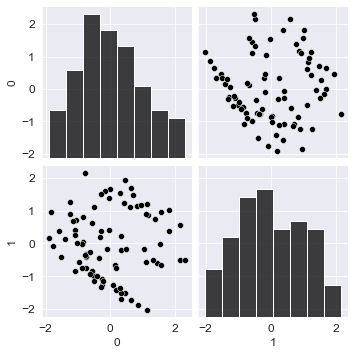

In [63]:
sns.pairplot(pd.DataFrame(df_s)) # Try to get some intuiton of data